In [1]:
import psychrnn
from psychrnn.tasks import rdm as rd
from psychrnn.backend.models.basic import Basic

import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

/Users/jasminestone/anaconda2/envs/py27tensorflow/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


define params globally first before passing to RDM, mess w/ model params and explain what can do. (can turn on and off dale's law). some masking, input output connectivity. train_params variables stuff

In [2]:
dt = 10 # time-step
tau = 100 # intrinsic time constant of neural state decay
T = 2000 # time to run for (number of steps is T/dt)
N_batch = 50 # number of trials per training step
N_rec = 50 # number of recurrent units
name = 'basicModel'

In [3]:
rdm = rd.RDM(dt = dt, tau = tau, T = T, N_batch = N_batch)

RDM puts the params passed in as well as other generated params into a dict we can then use to create our model. 

In [4]:
params = rdm.__dict__
print(params)

{'tau': 100, 'N_in': 2, 'N_batch': 50, 'T': 2000, 'N_steps': 200, 'alpha': 0.1, 'dt': 10, 'N_out': 2}


Generate *N_batch* trials to be used in training

In [5]:
gen = rdm.batch_generator()

We add in a few params that Basic(RNN) needs but that RDM doesn't generate for us.

In [6]:
params['name'] = name #Used to scope out a namespace for global variables.
params['N_rec'] = N_rec

There are some other optional parameters we can add in:

In [7]:
params['dale_ratio'] = None # Default: None -- when the dale_ratio is set, dale's law is applied
params['rec_noise'] = 0.0 # Default: 0.0 -- how much noise to add to the new_state calculation
params['W_in_train'] = True # Indicates whether W_in is trainable. Default: True
params['W_rec_train'] = True # Indicates whether W_rec is trainable. Default: True
params['W_out_train'] = True # Indicates whether W_out is trainable. Default: True
params['b_rec_train'] = True # Indicates whether b_rec is trainable. Default: True
params['b_out_train'] = True # Indicates whether b_out is trainable. Default: True
params['init_state_train'] = True # Indicates whether init_state is trainable. Default: True
params['load_weights_path'] = None # When given a path, loads weights from file in that path. Default: None

Instantiate our model

In [8]:
basicModel = Basic(params)

Start a tensorflow session with loss, regularization, predictions, and regularized loss defined.

In [9]:
basicModel.build()

Set the training parameters for our model. All of the parameters below are optional.

In [10]:
train_params = {}
train_params['save_weights_path'] =  '../weights/refactor_weights.npz' # Where to save the model after training. Default: None
train_params['training_iters'] = 100000 # number of iterations to train for Default: 10000
train_params['learning_rate'] = .001 # Sets learning rate if use default optimizer Default: .001
train_params['loss_epoch'] = 10 # Compute and record loss every 'loss_epoch' epochs. Default: 10
train_params['verbosity'] = True # If true, prints information as training progresses. Default: True
train_params['save_training_weights_epoch'] = 100 # save training weights every 'save_training_weights_epoch' epochs. Default: 100
train_params['training_weights_path'] = None # where to save training weights as training progresses. Default: None
train_params['generator_function'] = None # replaces trial_batch_generator with the generator_function when not none. Default: None
train_params['optimizer'] = tf.train.AdamOptimizer(learning_rate=train_params['learning_rate']) # What optimizer to use to compute gradients. Default: tf.train.AdamOptimizer(learning_rate=train_params['learning_rate'])
train_params['clip_grads'] = True # If true, clip gradients by norm 1. Default: True

Train our model.

In [11]:
basicModel.train(gen, train_params)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Iter 500, Minibatch Loss= 0.225647
Iter 1000, Minibatch Loss= 0.155618
Iter 1500, Minibatch Loss= 0.141339
Iter 2000, Minibatch Loss= 0.124116
Iter 2500, Minibatch Loss= 0.117556
Iter 3000, Minibatch Loss= 0.114681
Iter 3500, Minibatch Loss= 0.117668
Iter 4000, Minibatch Loss= 0.124333
Iter 4500, Minibatch Loss= 0.117334
Iter 5000, Minibatch Loss= 0.106762
Iter 5500, Minibatch Loss= 0.096997
Iter 6000, Minibatch Loss= 0.049483
Iter 6500, Minibatch Loss= 0.031262
Iter 7000, Minibatch Loss= 0.020954
Iter 7500, Minibatch Loss= 0.036378
Iter 8000, Minibatch Loss= 0.017591
Iter 8500, Minibatch Loss= 0.014523
Iter 9000, Minibatch Loss= 0.016982
Iter 9500, Minibatch Loss= 0.043853
Iter 10000, Minibatch Loss= 0.025205
Iter 10500, Minibatch Loss= 0.013798
Iter 11000, Minibatch Loss= 0.013404
Iter 11500, Minibatch Loss= 0.011769
Iter 12000, Minibatch Loss= 0.011737
Iter 12500, Minibatch Loss= 0.011323
Iter 13000, Minibatch 

([0.22564714,
  0.15561755,
  0.1413392,
  0.12411648,
  0.117556065,
  0.11468116,
  0.117668435,
  0.12433288,
  0.11733355,
  0.10676242,
  0.09699695,
  0.049482964,
  0.031262152,
  0.020953612,
  0.036378246,
  0.017590905,
  0.014523358,
  0.01698188,
  0.043853488,
  0.025204636,
  0.013798025,
  0.013403629,
  0.011769015,
  0.011737404,
  0.011323303,
  0.021880114,
  0.012769013,
  0.025273893,
  0.010620414,
  0.009069141,
  0.011811233,
  0.011813242,
  0.008009192,
  0.006509149,
  0.009571192,
  0.0070453826,
  0.008488107,
  0.009660457,
  0.0067813965,
  0.00876963,
  0.008761512,
  0.007013797,
  0.008205344,
  0.0055317758,
  0.006053939,
  0.00552105,
  0.007208519,
  0.0053493585,
  0.005113881,
  0.00744442,
  0.007924496,
  0.005676561,
  0.0062944135,
  0.0047793505,
  0.0055482695,
  0.0051221135,
  0.0048042433,
  0.005668904,
  0.005353057,
  0.0045053153,
  0.0043571503,
  0.004817103,
  0.004284603,
  0.004282665,
  0.0044844314,
  0.00393349,
  0.004109071

### Plot results

Extract the next trial from the generator

In [12]:
x,y,m = next(gen)

Plot the x value of the trial -- for the RDM, this includes two input neurons ith different coherence. TODO(jasmine):x is time step, y is magnitude of input (arbitrary)

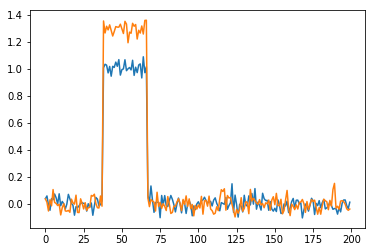

In [13]:
plt.plot(x[0,:,:])

Run the trained model on this trial (not included in the training set).

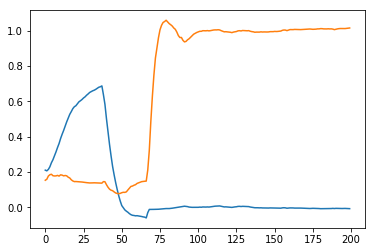

In [14]:
plt.plot(basicModel.test(x)[0][0,:,:])

clean up the model to clear out the tensorflow namespace

In [15]:
basicModel.destruct()